In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import re

# Data Load

In [2]:
review = "Ordered java chip frappucinno and it was too sweet"
entities = ["java chip frappucinno"]

In [3]:
spacy_res = pd.read_csv("spacy_train_clean.csv")

In [4]:
import ast
spacy_res['entities_clean'] = spacy_res['entities_clean'].apply(lambda x: ast.literal_eval(x))

In [5]:
spacy_res['entities'] = spacy_res.apply(lambda x: [x['text'][i[0]:i[1]] for i in x['entities_clean']],axis=1)

# Combine Entities

In [6]:
def combine_duplicate_entities(review,entities):
    for i in entities:
        pass

# Benepar Load

In [223]:
import benepar
benepar.download("benepar_en2")
parser = benepar.Parser("benepar_en2")

[nltk_data] Downloading package benepar_en2 to
[nltk_data]     /Users/nicowinata/nltk_data...
[nltk_data]   Package benepar_en2 is already up-to-date!


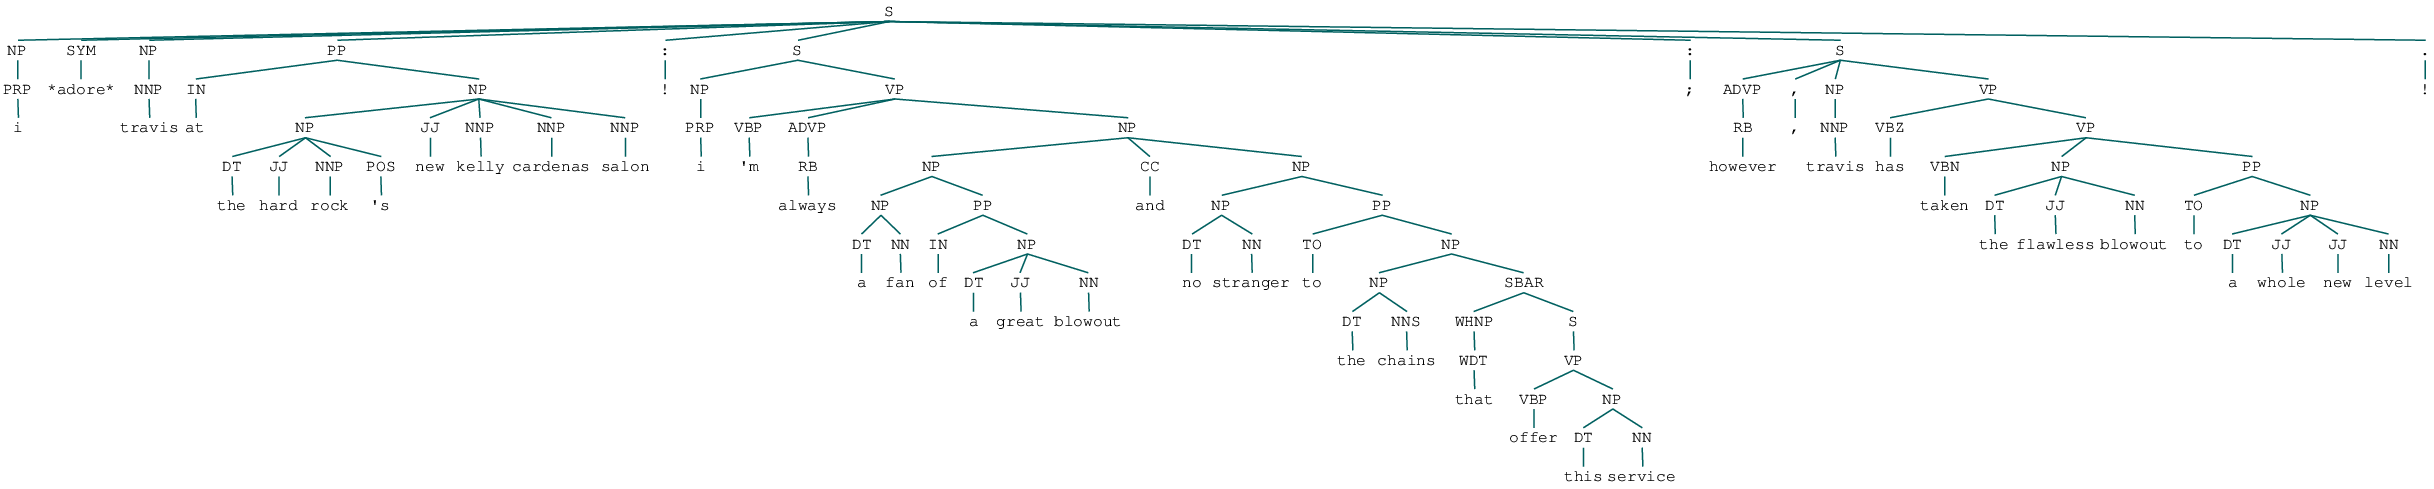

In [225]:
u = parser.parse(spacy_res['text'][1].split('\n')[0])
u

# Stanford NLP Load

In [120]:
review1 = 'I got the chicken burrito which looked unassuming but was full of flavor and huge My wife got the kale salad and also the pork was awesome but actually the service is poor We will definitely be back'

In [51]:
#sentiment analyzer load
from pycorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000')

In [53]:
stanfordnlp.download('en')
dep_nlp = stanfordnlp.Pipeline()

Using the default treebank "en_ewt" for language "en".
Would you like to download the models for: en_ewt now? (Y/n)
Y

Default download directory: /Users/nicowinata/stanfordnlp_resources
Hit enter to continue or type an alternate directory.


Download location: /Users/nicowinata/stanfordnlp_resources/en_ewt_models.zip


100%|██████████| 235M/235M [01:00<00:00, 3.74MB/s] 



Download complete.  Models saved to: /Users/nicowinata/stanfordnlp_resources/en_ewt_models.zip
Extracting models file for: en_ewt
Cleaning up...Done.


In [136]:
doc = dep_nlp(review1)
doc.sentences[0]
for i in range(len(doc.sentences)):
    print(doc.sentences[i].print_dependencies())

../aten/src/ATen/native/LegacyDefinitions.cpp:14: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead.


In [52]:
#load parser
import stanfordnlp
from stanfordcorenlp import StanfordCoreNLP
import logging
import json

class StanfordNLP:
    def __init__(self, host='http://localhost', port=9000):
        self.nlp = StanfordCoreNLP(host, port=port,
                                   timeout=30000)  # , quiet=False, logging_level=logging.DEBUG)
        self.props = {
            'annotators': 'tokenize,ssplit,pos,lemma,ner,parse,depparse,dcoref,relation',
            'pipelineLanguage': 'en',
            'outputFormat': 'json'
        }

    def word_tokenize(self, sentence):
        return self.nlp.word_tokenize(sentence)

    def pos(self, sentence):
        return self.nlp.pos_tag(sentence)

    def ner(self, sentence):
        return self.nlp.ner(sentence)

    def parse(self, sentence):
        return self.nlp.parse(sentence)

    def dependency_parse(self, sentence):
        return self.nlp.dependency_parse(sentence)

    def annotate(self, sentence):
        return json.loads(self.nlp.annotate(sentence, properties=self.props))

    @staticmethod
    def tokens_to_dict(_tokens):
        tokens = defaultdict(dict)
        for token in _tokens:
            tokens[int(token['index'])] = {
                'word': token['word'],
                'lemma': token['lemma'],
                'pos': token['pos'],
                'ner': token['ner']
            }
        return tokens

    
if __name__ == '__main__':
    sNLP = StanfordNLP()
    text = 'A blog post using Stanford CoreNLP Server. Visit www.khalidalnajjar.com for more details.'
    print("Parse:", sNLP.parse(text))

KeyboardInterrupt: 

In [12]:
u = StanfordNLP('http://localhost')

In [13]:
u.parse('A blog post using Stanford CoreNLP Server. Visit www.khalidalnajjar.com for more details.')

'(ROOT\n  (S\n    (NP (DT A) (NN blog))\n    (VP (NN post)\n      (S\n        (VP (VBG using)\n          (NP (NNP Stanford) (NNP CoreNLP) (NN Server)))))\n    (. .)))'

# Modular Code

In [7]:
import collections

def remove_nestings(lst): 
    output = []
    
    def remove_nestings_recursive(l):
        for i in l: 
            if type(i) == list: 
                remove_nestings_recursive(i) 
            else: 
                output.append(i)
    
    remove_nestings_recursive(lst)
    
    return output

remove_nestings([[1,2],3])

[1, 2, 3]

In [8]:
def continue_splitting(review,list_of_dividers):
        
    temp = list_of_dividers.copy()
    l = [review]
    while len(temp) > 0:
        divider = temp.pop(0)
        l_new = []
        for i in l:
            l_new += i.split(divider)
        l = l_new
    return l

l = 'abcdefgabcdefg'
list_of_dividers = ['b','b','efg']

list_of_split_clauses = continue_splitting(l,list_of_dividers)
list_of_split_clauses

['a', 'cd', 'a', 'cd', '']

In [9]:
def join_clause(review, list_of_split_clauses, list_of_dividers):
    output = []
    loc_of_split_clauses = []
    for clause in list_of_split_clauses:
        loc_of_split_clauses.append(review.find(clause))
    for divider in list_of_dividers:
        print(divider)
        loc_div = review.find(divider)
        print(loc_div)
        for i in range(len(loc_of_split_clauses)):
            if loc_div > loc_of_split_clauses[i]:
                print(loc_div,loc_of_split_clauses[i])

In [10]:
def join_partitions(long_review,entity_with_review):
    loclist = []
    for (_, clause) in entity_with_review:
        loclist.append((long_review.find(clause),long_review.find(clause)+len(clause)))
    starts = {i for (i,j) in loclist}
    ends = {j for (i,j) in loclist}
    starts.add(len(long_review))
    newends = {}
    for i in ends:
        newends[i] = min([x for x in starts if x >= i])
    for i in newends:
        pass
    new_entity_with_review = []
    for i in range(len(loclist)):
        tup = loclist[i]
        entity = entity_with_review[i][0]
        st = tup[0]
        en = newends[tup[1]]
        new_entity_with_review.append((entity,long_review[st:en]))
    return new_entity_with_review

In [11]:
join_partitions('Tim is amazing. Timmy timmy timmy tim.', [('Tim', 'Tim is amazing'), ('Timmy','TiMMY TIMMY')])

[('Tim', 'Tim is amazing. Timmy timmy timmy tim.'), ('Timmy', '.')]

In [239]:
def split_long_string(review):
    num = len(review)
    split_list = []
    start = 0
    end = 0
    while num != end:
        #if one step away from end of review
        if num - end < 1000:
            end = num
            split_list.append(review[start:end])
        
        #otherwise, find the last full stop
        else:
            end = review[start:(start+1000)].rfind('.') + start
            if end == -1:
                end = review[start:(start+1000)].rfind(' ') + start #if no '.', space will do
                if end == -1:
                    end = min(start + 1000,num) + start #if there still isn't, then we simply split
            split_list.append(review[start:end])
            start = end
    return(split_list)

In [241]:
def split_very_long_string(review):
    num = len(review)
    split_list = []
    start = 0
    end = 0
    while num != end:
        #if one step away from end of review
        if num - end < 1000:
            end = num
            split_list.append(review[start:end])
        
        #otherwise, find the last full stop
        else:
            end = review[start:(start+400)].rfind('.') + start
            if end == -1:
                end = review[start:(start+400)].rfind(' ') + start #if no '.', space will do
                if end == -1:
                    end = min(start + 400,num) + start #if there still isn't, then we simply split
            split_list.append(review[start:end])
            start = end
    return(split_list)

In [216]:
long_review = "Went there on a Tuesday night with some friends for my husbands birthday dinner. Got there at 6:30 and was told it would be a 15-20 minute wait. We got ourselves seated at the bar and were promptly greeted by the bartender. He walked us through the fresh Agua Frescas drinks and their signature cocktails. I ordered the cucumber lime Agua Fresca with gin and my friend ordered the blood orange marg. Both were knock your socks off good! Little hefty on price, but delicious! Also ordered the Citrus Agua Frescas and a Pineapple mojito....same caliper...delish! Chips and salsa were amazing. Nice hefty chips with just the right amount of salt. Smoky, spicy salsa that wasn't too chunky. We waited for our table for about 30 minutes before the waitress came and grabbed us. She was very apologetic but we told her were fine waiting with drinks and chips! \n"+"Next came the food. Our group ordered the machaca burrito, short ribs tacos, carne asada burrito and a grilled and fried fish taco. Also ordered the mexican street corn. \n"+"Starting with tacos: \n"+"We were told the best seller was the short rib tacos. I found them to lack any flavor at all and had to add salt and salsa to give them any taste. Same goes for the grilled fish. Very bland. \n"+"Burritos: Carne Asada burrito was ok. Not great.  It was a huge burrito that my husband only ate half of. \n"+"Machaca burrito was good. I didn't try this but was told by my friend that it was really good at the beginning, but then lost it's luster half way through. \n"+"Grilled Street Corn: I consider myself an aficionado on Mexican street corn. When driving through Mesa, I drive slow so that I can look for the carts and will stop and order it. I love, Love LOVE street corn. While they made a great attempt, it wasn't on point. The corn was way over cooked...almost mushy.  Didn't have a great deal of spice, even though there was chili powder on it. The cotija cheese was yummy. \n""All in all, this place is great for pre-dinner drinks and appetizers. I will definitely try it again, but will order something else.\n"+"I give the drinks a 5 out of 5\n"+"I give the food a 2 out of 5. \n"+"I give the chips and salsa a 4.5 out of 5."
long_review = long_review.replace('\n','')
long_entities = ['taco','salsa']

In [13]:
def split_review_naive(review,entities):
    clauses = re.split('[.?!]',review)
    lenlist = [len(x) for x in clauses]
    clauses = [x for _, x in sorted(zip(lenlist,clauses),reverse=False)]
    entity_with_clause = []
    for entity in entities:
        for clause in clauses:
            if entity in clause:
                entity_with_clause.append((entity,clause))
                break
    return(join_partitions(review,entity_with_clause))
split_review_naive(review,entities)

[('java chip frappucinno',
  'Ordered java chip frappucinno and it was too sweet')]

In [14]:
def min_tree(review, entities, parser, output = 'minimum'):
    
    #review is string, entities is list of strings, parser is parser object
    #possible outputs: no_parse, minimum, partition, all
    
    if output == 'no_parse':
        return(split_review_naive(review,entities))
        
    treelist = []
    lenlist = []
    temp = review.split('\n')
    
    if len(review) > 1000:
        split_reviews = split_long_string(review)
    else:
        split_reviews = [i for i in temp if len(i) > 1 and len(i) <= 1000 ]
    
    #if output is partition, we need to keep track of the full review
    if output == 'partition':
        full_review = ''
    
    #constituency parsers
    
    for rev in split_reviews:
        if rev and rev.strip():
            u = parser.parse(rev) # tree 

            if type(u) == str:
                u = nltk.Tree.fromstring(u)

            for s in u.subtrees(): # subtrees 
                if s.label() == 'S': # if sentence
                    treelist += [s]
                    lenlist += [len(s.leaves())] # how long clause
                        
            if output == 'partition':
                full_review += ' '.join(u.leaves()) + ' '

    treelist = [x for _, x in sorted(zip(lenlist,treelist),reverse=False)] # sort by lenlisit
    clauses = [' '.join(tree.leaves()) for tree in treelist]
    
    #If there is no sentences detected, then the full review is the only clause.
    if not clauses:
        if output == 'partition':
            clauses.append(full_review)
        else:
            clauses.append(review)
    entity_with_clause = []
    
    if output == 'all':
        for entity in entities:
            clauselist = []
            for clause in clauses:
                if entity in clause:
                    clauselist.append(clause)
            entity_with_clause.append((entity,clauselist))
    
    #TODO: create rules and test them
    elif output == 'minimum':
        for entity in entities:
            for clause in clauses:
                if entity in clause:
                    entity_with_clause.append((entity,clause))
                    break
                    
    elif output == 'partition':
        #first find minimal clause
        for entity in entities:
            for clause in clauses:
                if entity in clause:
                    entity_with_clause.append((entity,clause))
                    break
        #get location of minimal clause in review
        
        entity_with_clause = join_partitions(full_review,entity_with_clause)
    
    return entity_with_clause
    
    

In [191]:
def dependency_tree(review, entities, parser, output = 'split_min'):
    #possible output = split_min, split_all, tree_min, tree_all -> split only uses sentence splitter, while tree takes into account tree structure
    doc = parser(review)
    
    if output == 'split_min' or output == 'split_all' or output == 'split_part':
        clauses = list(doc.sents)
    #length of every clause
    
    lenlist = [len(str(x)) for x in clauses]
        
    #sort
    clauses = [str(x) for _, x in sorted(zip(lenlist,clauses),reverse=False)]
    
    
    entity_with_clause = []
    
    if output == 'split_min':
        for entity in entities:
            for clause in clauses:
                if entity in clause:
                    entity_with_clause.append((entity,clause))
                    break
                    
    if output == 'split_all':
        for entity in entities:
            clauselist = []
            for clause in clauses:
                if entity in clause:
                    clauselist.append(clause)
            entity_with_clause.append((entity,clauselist))
    
    if output == 'split_part':
        for entity in entities:
            for clause in clauses:
                if entity in clause:
                    entity_with_clause.append((entity,clause))
                    break
        #get location of minimal clause in review
        
        entity_with_clause = join_partitions(review,entity_with_clause)
            
    
    return(entity_with_clause)
        
        
    

In [197]:
review2 = spacy_res.loc[36]['text']
entities2 = spacy_res.loc[36]['entities']
dependency_tree(review2,entities2,nlp1,output='split_part')

[('must',
  'definitely a must visit for locals and visitors alike! you will not feel like you\'re in "pittsburgh".'),
 ('food',
  'great food, drinks, and service, but the atmosphere is second to none. ')]

In [111]:
import spacy

nlp1 = spacy.load("en_core_web_sm")

In [139]:
doc1 = nlp1(review1)

for token in doc1:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,token.head.text)

I -PRON- PRON PRP nsubj got
got get VERB VBD ROOT got
the the DET DT det chicken
chicken chicken NOUN NN nsubj burrito
burrito burrito NOUN NN ccomp got
which which DET WDT nsubj looked
looked look VERB VBD advcl got
unassuming unassuming ADJ JJ dobj looked
but but CCONJ CC cc looked
was be VERB VBD conj looked
full full ADJ JJ acomp was
of of ADP IN prep full
flavor flavor NOUN NN pobj of
and and CCONJ CC cc flavor
huge huge ADJ JJ advmod got
My -PRON- DET PRP$ poss wife
wife wife NOUN NN nsubj got
got get VERB VBD conj was
the the DET DT det kale
kale kale NOUN NN nsubj salad
salad salad NOUN NN ccomp got
and and CCONJ CC cc got
also also ADV RB advmod was
the the DET DT det pork
pork pork NOUN NN nsubj was
was be VERB VBD conj got
awesome awesome ADJ JJ acomp was
but but CCONJ CC cc is
actually actually ADV RB advmod is
the the DET DT det service
service service NOUN NN nsubj is
is be VERB VBZ ROOT is
poor poor ADJ JJ acomp is
We -PRON- PRON PRP nsubj be
will will VERB MD aux be
def

In [138]:
from spacy import displacy
from IPython.core.display import display, HTML
from pathlib import Path


In [140]:
for sent in list(doc1.sents):
    print(sent)

I got the chicken burrito which looked unassuming but was full of flavor and huge My wife got the kale salad and also the pork was awesome
but actually the service is poor
We will definitely be back


In [115]:
review1 = 'I got the chicken burrito which looked unassuming but was full of flavor and huge. My wife got the kale salad and also the pork was awesome but actually the service is poor. We will definitely be back!'

In [ ]:
review2 = spacy_res.loc[31]['text']
entities2 = spacy_res.loc[31]['entities']
min_tree(review2,entities2,parser,output='minimum')

In [188]:
from pycorenlp import StanfordCoreNLP
def stanford_sentiment_start():
    nlp = StanfordCoreNLP('http://localhost:9000')
    return nlp
    
def stanford_sentiment(entity_with_clause):
    stanford_sentiment_start()
    entity_with_sentiment = []
    for entity, clause in entity_with_clause:
        result = nlp.annotate(clause,
                   properties={
                       'annotators': 'sentiment',
                       'outputFormat': 'json'
                   })
        sentiment = np.dot(result['sentences'][0]['sentimentDistribution'], [-2, -0.1, 0, 0.1, 2])
        entity_with_sentiment.append((entity, sentiment))
    return entity_with_sentiment

In [189]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def vader_sentiment(entity_with_clause):
    analyzer = SentimentIntensityAnalyzer()
    entity_with_sentiment = []
    for entity, clause in entity_with_clause:
        sentiment = analyzer.polarity_scores(clause)['compound']
        entity_with_sentiment.append((entity,sentiment))
    return(entity_with_sentiment)        

In [25]:
#TODO: Entity can be double
#EDA: top entities for each restauratn
#validation code / manual labeling

In [152]:
review = spacy_res.loc[202]['text']
print(review,'\n')

entities = spacy_res.loc[202]['entities']
a = min_tree(review,entities,parser)
print(a)
vader_sentiment(a)

food taste ok. i like the pasta selection. however, there is no seafood choices at all. if you are looking for seafood, skip this place. 

[('pasta', 'i like the pasta selection'), ('taste', 'food taste'), ('seafood', 'you are looking for seafood'), ('seafood', 'you are looking for seafood'), ('food', 'food taste')]


[('pasta', 0.3612),
 ('taste', 0.0),
 ('seafood', 0.0),
 ('seafood', 0.0),
 ('food', 0.0)]

In [253]:
rev = 'I loved the mac and cheese in the restaurant, but I hated that they only offered cheap beer such as Miller Lite'
ents = ['mac and cheese','beer']

In [268]:
werk(rev,ents,parser,rule='rule_2')

[('mac and cheese', 0.5994), ('beer', -0.6369)]

In [269]:
werk2(rev,ents,parser,rule='rule_2')

[('mac and cheese', 'I loved the mac and cheese in the restaurant'),
 ('beer', 'I hated that they only offered cheap beer such as Miller Lite')]

In [260]:
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores('I loved the mac and cheese in the restaurant')['compound']

0.5994

In [189]:
nlp = StanfordCoreNLP('http://localhost:9000')
review1 = 'I tried a trio of various tacos. All of them were fantastic. Fresh ingredients. Very tasty! Fun atmosphere. I have to go back for the taco Tuesday and margaritas special. Will definitely eat here again.'
nlp.annotate(rev,
                   properties={
                       'annotators': 'sentiment',
                       'outputFormat': 'json'
                   })['sentences'][0]['sentimentDistribution']

[0.31576454142389,
 0.60225383869635,
 0.06426557739301,
 0.0076956570306,
 0.01002038545615]

In [190]:
review = spacy_res.loc[10]['text']
entities = spacy_res.loc[10]['entities']
a = min_tree(review,entities,parser)

In [186]:
df.loc[256]['text']

"My husband and I had some errands to run in Gilbert and We drove by this place so We thought we would give it a try. Wow! We weren't disappointed. We had shrimp ceviche, chicken burrito, pork and chicken and fish tacos. Everything was on point. Delicious and fresh. We will definitely come back here again when we in the area. Wish there was the one near by where we live."

In [187]:
rev = 'My husband and I had some errands to run in Gilbert and We drove by this place so We thought we would give it a try. '

In [30]:
# Version 2 - What if parser and sentiment works in tandem?

rule_1 : minimum tree

rule_2 : minimum tree containing abs(sentiment score) > 0.2 / can tune

rule_3 : mean of all trees containing the word / median

rule_4 : ensure all review is fully partitioned



In [186]:
def sentiment_analysis(entity_with_review, sentiment_package = 'stanford'):
    #takes in list of tuples
    if sentiment_package == 'stanford':
        return stanford_sentiment(entity_with_review)
    elif sentiment_package == 'vader':
        return vader_sentiment(entity_with_review)
    else:
        raise Exception('incorrect sentiment package')

def sentiment_analysis_indiv(clause,sentiment_package = 'stanford'):
    #takes in a single review
    if sentiment_package == 'stanford':
        stanford_sentiment_start()
        result = nlp.annotate(clause,
                   properties={
                       'annotators': 'sentiment',
                       'outputFormat': 'json'
                   })
        return np.dot(result['sentences'][0]['sentimentDistribution'], [-2, -1, 0, 1, 2])
    elif sentiment_package == 'vader':
        analyzer = SentimentIntensityAnalyzer()
        return analyzer.polarity_scores(clause)['compound']
    else:
        raise Exception('incorrect sentiment package')
        



In [263]:
def werk(review, entities, parser = [], sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_1'):
    
    #print("\nLoading Parser")
    
    #first is the parser


    #distinguish between constituency and dependency rules
    
    #dependency
    dependency_rules = ['rule_7','rule_8','rule_9']
    if rule in dependency_rules:
        if parse_package != 'spacy' and parse_package != 'stanford':
            raise Exception('Dependency parsing requires spacy or stanford as parser')
        if not parser and parse_package == 'spacy':
            parser = spacy.load("en_core_web_sm")
        elif not parser and parse_package == 'stanford':
            #parser = StanfordNLP('http://localhost')
            raise Exception('not supported')
        else:
            pass
    #constituency    
    if not parser and parse_package == 'benepar':
        parser = benepar.Parser("benepar_en2")
    elif not parser and parse_package == 'stanford':
        #parser = StanfordNLP('http://localhost')
        raise Exception('not supported')
    elif parser:
        pass
    else:
        raise Exception('incorrect parse package')
    

        
    #second is the rule
    
    #print("\nLoading Rule")
    
    if rule == 'rule_1':
        
        #print("Rule =",rule)
        
        entity_with_review = min_tree(review, entities, parser, output = 'minimum')
        
        #print("\nTree Generated")
        
        entity_with_sentiment = sentiment_analysis(entity_with_review, sentiment_package)
        
        #print("\nSentiment Generated")

        
    elif rule == 'rule_2':
        
        entity_with_review = min_tree(review, entities, parser, output = 'all')
        entity_with_sentiment = []
        sentiment = 0
        for ent, revlist in entity_with_review:
            for clause in revlist:
                sentiment = sentiment_analysis_indiv(clause,sentiment_package)
                if sentiment_package == 'vader' and sentiment != 0:
                    break
                elif sentiment_package == 'stanford' and abs(sentiment) > 0.5:
                    break
                    #if sentiment is not neutral, stop. If sentiment is neutral, keep going up tree.                    
            entity_with_sentiment.append((ent,sentiment))        
        
    elif rule == 'rule_3':
        
        #print("Rule =",rule)
        
        entity_with_review = min_tree(review, entities, parser, output = 'all')
        
        #print("\nTree Generated")
        
        entity_with_sentiment = []
        for ent, revlist in entity_with_review:
            sentiment_list = []
            for clause in revlist:
                sentiment = sentiment_analysis_indiv(clause,sentiment_package)
                sentiment_list.append(sentiment)
            if not sentiment_list:
                sentiment_list.append(0)
            entity_with_sentiment.append((ent,np.mean(sentiment_list)))
            
        #print("\nSentiment Generated") 
        
    elif rule == 'rule_4':
        
        #print("Rule =",rule)
        
        entity_with_review = min_tree(review, entities, parser, output = 'partition')
        #print("\nTree Generated")
        
        entity_with_sentiment = sentiment_analysis(entity_with_review, sentiment_package)
        
        #print("\nSentiment Generated")
        
    elif rule == 'rule_5':
        
        #print("Rule =",rule)
        
        entity_with_review = min_tree(review, entities, parser, output = 'minimum')
        entity_with_review_p = min_tree(review, entities, parser, output = 'partition')
        #print("\nTree Generated")
        
        entity_with_sentiment = sentiment_analysis(entity_with_review, sentiment_package)
        for i in range(len(entity_with_sentiment)):
            sent = entity_with_sentiment[i][1]
            if sentiment_package == 'vader' and sent != 0:
                entity_with_sentiment[i] = (entity_with_sentiment[i][0],sentiment_analysis_indiv(entity_with_review_p[i][1],sentiment_package))
            elif sentiment_package == 'stanford' and abs(sent) > 0.5:
                entity_with_sentiment[i] = (entity_with_sentiment[i][0],sentiment_analysis_indiv(entity_with_review_p[i][1],sentiment_package))
    
    elif rule == 'rule_6':
        
        entity_with_review = min_tree(review, entities, parser, output = 'no_parse')
        entity_with_sentiment = sentiment_analysis(entity_with_review, sentiment_package)
        
        #print("\nSentiment Generated")
    
    elif rule == 'rule_7':
        entity_with_review = dependency_tree(review, entities, parser, output = 'split_min')
        entity_with_sentiment = sentiment_analysis(entity_with_review, sentiment_package)
        
    elif rule == 'rule_8':
        entity_with_review = dependency_tree(review, entities, parser, output = 'split_all')
        
        #print("\nTree Generated")
        entity_with_sentiment = []
        sentiment = 0
        for ent, revlist in entity_with_review:
            for clause in revlist:
                sentiment = sentiment_analysis_indiv(clause,sentiment_package)
                if sentiment_package == 'benepar' and abs(sentiment) != 0:
                    break
                elif sentiment_package == 'stanford' and abs(sentiment) > 0.5:
                    break
                    #if sentiment is not neutral, stop. If sentiment is neutral, keep going up tree.
            entity_with_sentiment.append((ent,sentiment))
    
    elif rule == 'rule_9':
        entity_with_review = dependency_tree(review, entities, parser, output = 'split_min')
        entity_with_review_p = dependency_tree(review, entities, parser, output = 'split_part')
        entity_with_sentiment = sentiment_analysis(entity_with_review, sentiment_package)
        for i in range(len(entity_with_sentiment)):
            sent = entity_with_sentiment[i][1]
            if sentiment_package == 'vader' and sent != 0:
                entity_with_sentiment[i] = (entity_with_sentiment[i][0],sentiment_analysis_indiv(entity_with_review_p[i][1],sentiment_package))
            elif sentiment_package == 'stanford' and abs(sent) > 0.5:
                entity_with_sentiment[i] = (entity_with_sentiment[i][0],sentiment_analysis_indiv(entity_with_review_p[i][1],sentiment_package))
    
    else:
        raise Exception('incorrect rule')
        
    
    
    return(entity_with_sentiment)
    

In [267]:
def werk2(review, entities, parser = [], sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_1'):
    
    #first is the parser


    #distinguish between constituency and dependency rules
    
    #dependency
    dependency_rules = ['rule_7','rule_8','rule_9']
    if rule in dependency_rules:
        if parse_package != 'spacy' and parse_package != 'stanford':
            raise Exception('Dependency parsing requires spacy or stanford as parser')
        if not parser and parse_package == 'spacy':
            parser = spacy.load("en_core_web_sm")
        elif not parser and parse_package == 'stanford':
            #parser = StanfordNLP('http://localhost')
            raise Exception('not supported')
        else:
            pass
    #constituency    
    if not parser and parse_package == 'benepar':
        parser = benepar.Parser("benepar_en2")
    elif not parser and parse_package == 'stanford':
        #parser = StanfordNLP('http://localhost')
        raise Exception('not supported')
    elif parser:
        pass
    else:
        raise Exception('incorrect parse package')


        
    #second is the rule
    
    
    if rule == 'rule_1':
        
        
        entity_with_review = min_tree(review, entities, parser, output = 'minimum')
        
        
    elif rule == 'rule_2':
        
        entity_with_review = min_tree(review, entities, parser, output = 'all')
        new_entity_with_review = []
        entity_with_sentiment = []
        sentiment = 0
        for ent, revlist in entity_with_review:
            for clause in revlist:
                sentiment = sentiment_analysis_indiv(clause,sentiment_package)
                if sentiment_package == 'vader' and sentiment != 0:
                    new_entity_with_review.append((ent,clause))
                    break
                elif sentiment_package == 'stanford' and abs(sentiment) > 0.5:
                    new_entity_with_review.append((ent,clause))
                    break
                    #if sentiment is not neutral, stop. If sentiment is neutral, keep going up tree.                    
            entity_with_sentiment.append((ent,sentiment))
            
        entity_with_review = new_entity_with_review
        
    elif rule == 'rule_4':
        
        
        entity_with_review = min_tree(review, entities, parser, output = 'partition')
    
    elif rule == 'rule_5':
        
        
        entity_with_review = min_tree(review, entities, parser, output = 'minimum')
        entity_with_review_p = min_tree(review, entities, parser, output = 'partition')
        
        entity_with_sentiment = sentiment_analysis(entity_with_review, sentiment_package)
        for i in range(len(entity_with_sentiment)):
            sent = entity_with_sentiment[i][1]
            if sentiment_package == 'vader' and sent != 0:
                entity_with_review[i] = entity_with_review_p[i]
            elif sentiment_package == 'stanford' and abs(sent) > 0.5:
                entity_with_review[i] = entity_with_review_p[i]
    
    elif rule == 'rule_6':
        
        entity_with_review = min_tree(review, entities, parser, output = 'no_parse')
    
    elif rule == 'rule_7':
        
        
        entity_with_review = dependency_tree(review, entities, parser, output = 'split_min')
        
        
    elif rule == 'rule_8':
        
        entity_with_review = dependency_tree(review, entities, parser, output = 'split_all')
        new_entity_with_review = []
        entity_with_sentiment = []
        sentiment = 0
        for ent, revlist in entity_with_review:
            for clause in revlist:
                sentiment = sentiment_analysis_indiv(clause,sentiment_package)
                if sentiment_package == 'vader' and sentiment != 0:
                    new_entity_with_review.append((ent,clause))
                    break
                elif sentiment_package == 'stanford' and abs(sentiment) > 0.5:
                    new_entity_with_review.append((ent,clause))
                    break
                    #if sentiment is not neutral, stop. If sentiment is neutral, keep going up tree.                    
            entity_with_sentiment.append((ent,sentiment))
            
        entity_with_review = new_entity_with_review
        
    elif rule == 'rule_9':
        
        
        entity_with_review = dependency_tree(review, entities, parser, output = 'split_min')
        entity_with_review_p = dependency_tree(review, entities, parser, output = 'split_part')
        
        entity_with_sentiment = sentiment_analysis(entity_with_review, sentiment_package)
        for i in range(len(entity_with_sentiment)):
            sent = entity_with_sentiment[i][1]
            if sentiment_package == 'vader' and sent != 0:
                entity_with_review[i] = entity_with_review_p[i]
            elif sentiment_package == 'stanford' and abs(sent) > 0.5:
                entity_with_review[i] = entity_with_review_p[i]
    
    else:
        raise Exception('incorrect rule')
    
    return(entity_with_review)
    

In [247]:
review = "great people making amazing pizza.  get the presto pesto with chicken!  i could eat this everyday."
entities = ["chicken","pesto","pizza"]

In [250]:
 werk2(review,entities, parser = parser, sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_1')

[('chicken', 'get the presto pesto with chicken'),
 ('pesto', 'get the presto pesto with chicken'),
 ('pizza',
  'great people making amazing pizza . get the presto pesto with chicken ! i could eat this everyday .')]

In [205]:
 werk2(review,entities, parser = nlp1, sentiment_package = 'vader', parse_package = 'spacy', rule = 'rule_7')

[('chicken', 'get the presto pesto with chicken!  '),
 ('pesto', 'get the presto pesto with chicken!  '),
 ('pizza', 'great people making amazing pizza.  ')]

In [21]:
indexes = [1002,1005,10051,13351,133542,23522,23500,135221,95221,92222]

In [22]:
entities_list = [['pizza','meatball sliders', 'pie', 'fries'],
            ['chicken','biscuits','sauce'],
            ['noodles','chilies'],
            ['labneh','greek yogurt','pickled vegetables','olives','pita chips','service','staff','bourekas','potato','cheese','spinach','pastry','tapas','hummus','duzan salad','tabbouleh','fattoush salad','baba ganoush','tahini salad','grape leaves','magadara','rice','kibbeh','lamb shawarma','baklava','turkish coffee'],
            ['soda machine'],
            ['caesar salad', 'service','place','chicken'],
            ['place','chicken','price','tortilla','burrito','cheese'],
            ['ice cream','mint','chocolate chip bar','mango','passion fruit'],
            ['service','prices','bap','dining room'],
            ['food','servers']
           ]

In [42]:
for i in range(105,120):
    review = df.loc[i]['text']
    entities = ast.literal_eval(df.loc[i]['entities'])
    print("\n\n\n", file=open("output2.txt", "a"))
    print(review, file=open("output2.txt", "a"))
    print(entities, file=open("output2.txt", "a"))
    print("\n\n\n rule_1", file=open("output2.txt", "a"))
    print(werk2(review,entities,parser=parser,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_1'), file=open("output2.txt", "a"))
    print(werk(review,entities,parser=parser,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_1'), file=open("output2.txt", "a"))
    print("\n\n\n rule_2", file=open("output2.txt", "a"))
    print(werk2(review,entities,parser=parser,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_2'), file=open("output2.txt", "a"))
    print(werk(review,entities,parser=parser,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_2'), file=open("output2.txt", "a"))
    print("\n\n\n rule_4", file=open("output2.txt", "a"))
    print(werk2(review,entities,parser=parser,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_4'), file=open("output2.txt", "a"))
    print(werk(review,entities,parser=parser,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_4'), file=open("output2.txt", "a"))
    print("\n\n\n rule_5", file=open("output2.txt", "a"))
    print(werk2(review,entities,parser=parser,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_5'), file=open("output2.txt", "a"))
    print(werk(review,entities,parser=parser,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_5'), file=open("output2.txt", "a"))
    print("\n\n\n rule_6", file=open("output2.txt", "a"))
    print(werk2(review,entities,parser=parser,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_6'), file=open("output2.txt", "a"))
    print(werk(review,entities,parser=parser,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_6'), file=open("output2.txt", "a"))
    print("\n\n\n rule_3", file=open("output2.txt", "a"))
    print(werk(review,entities,parser=parser,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_3'), file=open("output2.txt", "a"))
    




In [36]:
for i in range(105,120):
    review = df.loc[i]['text']
    entities = ast.literal_eval(df.loc[i]['entities'])
    print("\n\n\n", file=open("output.txt", "a"))
    print(review, file=open("output.txt", "a"))
    print(entities, file=open("output.txt", "a"))
    print("\n\n\n rule_1", file=open("output.txt", "a"))
    print(werk2(review,entities,sentiment_package = 'stanford', parse_package = 'benepar', rule = 'rule_1'), file=open("output.txt", "a"))
    print(werk(review,entities,sentiment_package = 'stanford', parse_package = 'benepar', rule = 'rule_1'), file=open("output.txt", "a"))
    print("\n\n\n rule_2", file=open("output.txt", "a"))
    print(werk2(review,entities,sentiment_package = 'stanford', parse_package = 'benepar', rule = 'rule_2'), file=open("output.txt", "a"))
    print(werk(review,entities,sentiment_package = 'stanford', parse_package = 'benepar', rule = 'rule_2'), file=open("output.txt", "a"))
    print("\n\n\n rule_4", file=open("output.txt", "a"))
    print(werk2(review,entities,sentiment_package = 'stanford', parse_package = 'benepar', rule = 'rule_4'), file=open("output.txt", "a"))
    print(werk(review,entities,sentiment_package = 'stanford', parse_package = 'benepar', rule = 'rule_4'), file=open("output.txt", "a"))
    print("\n\n\n rule_5", file=open("output.txt", "a"))
    print(werk2(review,entities,sentiment_package = 'stanford', parse_package = 'benepar', rule = 'rule_5'), file=open("output.txt", "a"))
    print(werk(review,entities,sentiment_package = 'stanford', parse_package = 'benepar', rule = 'rule_5'), file=open("output.txt", "a"))
    print("\n\n\n rule_6", file=open("output.txt", "a"))
    print(werk2(review,entities,sentiment_package = 'stanford', parse_package = 'benepar', rule = 'rule_6'), file=open("output.txt", "a"))
    print(werk(review,entities,sentiment_package = 'stanford', parse_package = 'benepar', rule = 'rule_6'), file=open("output.txt", "a"))
    print("\n\n\n rule_3", file=open("output.txt", "a"))
    print(werk(review,entities,sentiment_package = 'stanford', parse_package = 'benepar', rule = 'rule_3'), file=open("output.txt", "a"))
    






/Users/nicowinata/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nicowinata/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


UnboundLocalError: local variable 'clause' referenced before assignment

In [318]:
for i in range(10100,11101):
    entities = spacy_res.loc[i]['entities']
    if entities:
        if len(entities) < 4:
            review = spacy_res.loc[i]['text']
            print("\n\n\n", file=open("output.txt", "a"))
            print(review, file=open("output.txt", "a"))
            print(entities, file=open("output.txt", "a"))
            print(werk2(review,entities,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_1'), file=open("output.txt", "a"))
            #print(werk(review,entities,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_1'), file=open("output.txt", "a"))
            print(werk2(review,entities,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_2'), file=open("output.txt", "a"))
            #print(werk(review,entities,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_2'), file=open("output.txt", "a"))
            #print(werk(review,entities,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_3'), file=open("output.txt", "a"))
            print(werk2(review,entities,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_4'), file=open("output.txt", "a"))
            #print(werk(review,entities,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_4'), file=open("output.txt", "a"))

KeyboardInterrupt: 

In [289]:
werk(review,entities,sentiment_package = 'vader', parse_package = 'benepar', rule = 'rule_4')


Loading Parser
Parser = benepar

Loading Rule
Rule = rule_4

Tree Generated

Sentiment Generated


[('bit', 0.9467), ('game', 0.9467)]